<a href="https://colab.research.google.com/github/JCherryA050/draft_emulator/blob/main/set_analysis_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -r ./drive/MyDrive/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 70.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 91.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Set Analysis Report

This notebook serves as a platform for analyzing limited sets, and for prototyping pipelines/models associated with draft prediction, card evaluation, and card database ingestion/pre-processing.

In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup

In [10]:
df = pd.read_json('./drive/MyDrive/AllPrintings.json')

In [11]:
df.head()

,meta,data
date,2023-02-18,NaN
version,5.2.1+20230218,NaN
10E,NaN,"{'baseSetSize': 383, 'block': 'Core Set', 'boo..."
2ED,NaN,"{'baseSetSize': 302, 'block': 'Core Set', 'boo..."
2X2,NaN,"{'baseSetSize': 577, 'booster': {'default': {'..."


In [13]:
df = df.reset_index()

In [14]:
one_data = df[df['index']=='ONE']['data']

In [15]:
dat = one_data.values[0]

In [16]:
type(dat['cards'])

list

In [17]:
len(dat['cards'])

479

In [18]:
df_cards = pd.DataFrame(dat['cards'])

In [19]:
df_cards.columns

Index(['artist', 'availability', 'boosterTypes', 'borderColor',
       'colorIdentity', 'colors', 'convertedManaCost', 'edhrecRank',
       'finishes', 'foreignData', 'frameVersion', 'hasFoil', 'hasNonFoil',
       'identifiers', 'language', 'layout', 'legalities', 'manaCost',
       'manaValue', 'name', 'number', 'originalText', 'originalType',
       'printings', 'purchaseUrls', 'rarity', 'rulings', 'setCode', 'subtypes',
       'supertypes', 'text', 'type', 'types', 'uuid', 'flavorText', 'keywords',
       'power', 'toughness', 'variations', 'isStorySpotlight', 'frameEffects',
       'leadershipSkills', 'securityStamp', 'watermark', 'loyalty',
       'edhrecSaltiness', 'isReprint', 'isFullArt', 'isStarter', 'promoTypes',
       'isPromo', 'isAlternative'],
      dtype='object')

In [20]:
df_cards = df_cards.drop_duplicates('name')

In [23]:
def combine_colors(x):
  out = "".join(x)
  return out


In [24]:
df_cards['colors'] = df_cards['colors'].map(combine_colors)

In [25]:
df_white = df_cards[df_cards['colors'] == 'W']

In [26]:
df_cards.groupby('colors').agg('count')

,artist,availability,boosterTypes,borderColor,colorIdentity,convertedManaCost,edhrecRank,finishes,foreignData,frameVersion,...,securityStamp,watermark,loyalty,edhrecSaltiness,isReprint,isFullArt,isStarter,promoTypes,isPromo,isAlternative
colors,,,,,,,,,,,,,,,,,,,,,
,45,45,45,45,45,45,40,45,45,45,...,19,0,0,12,12,5,0,0,0,0
B,40,40,39,40,40,40,40,40,40,40,...,10,0,1,3,3,0,1,0,0,0
BG,3,3,3,3,3,3,3,3,3,3,...,2,0,1,0,0,0,0,0,0,0
BGUW,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
BR,2,2,2,2,2,2,2,2,2,2,...,1,0,0,0,0,0,0,0,0,0
BU,3,3,3,3,3,3,3,3,3,3,...,2,0,1,0,0,0,0,0,0,0
BW,3,3,3,3,3,3,3,3,3,3,...,2,0,1,0,0,0,0,0,0,0
G,40,40,39,40,40,40,40,40,40,40,...,11,0,1,0,1,0,1,0,0,0
GR,3,3,3,3,3,3,3,3,3,3,...,2,0,1,0,0,0,0,0,0,0


In [27]:
df_cards.groupby(['colors','rarity']).agg('count')

artist  availability  boosterTypes  borderColor  \
colors rarity                                                      
       common        21            21            21           21   
       mythic         2             2             2            2   
       rare          17            17            17           17   
       uncommon       5             5             5            5   
B      common        17            17            17           17   
       mythic         3             3             3            3   
       rare           7             7             6            7   
       uncommon      13            13            13           13   
BG     rare           2             2             2            2   
       uncommon       1             1             1            1   
BGUW   mythic         1             1             1            1   
BR     rare           1             1             1            1   
       uncommon       1             1             1            1   
BU     rare           2             2             2            2   
       uncommon       1             1             1            1   
BW     rare           2             2             2            2   
       uncommon       1             1             1            1   
G      common        17            17            17           17   
       mythic         3             3             3            3   
       rare           7             7             6            7   
       uncommon      13            13            13           13   
GR     mythic         1             1             1            1   
       rare           1             1             1            1   
       uncommon       1             1             1            1   
GU     rare           1             1             1            1   
       uncommon       1             1             1            1   
GW     rare           1             1             1            1   
       uncommon       1             1             1            1   
R      common        17            17            17           17   
       mythic         3             3             3            3   
       rare           7             7             6            7   
       uncommon      13            13            13           13   
RU     rare           1             1             1            1   
       uncommon       1             1             1            1   
RW     mythic         1             1             1            1   
       rare           1             1             1            1   
       uncommon       1             1             1            1   
U      common        17            17            17           17   
       mythic         3             3             3            3   
       rare           7             7             6            7   
       uncommon      13            13            13           13   
UW     rare           1             1             1            1   
       uncommon       1             1             1            1   
W      common        17            17            17           17   
       mythic         3             3             3            3   
       rare           7             7             6            7   
       uncommon      13            13            13           13   

                 colorIdentity  convertedManaCost  edhrecRank  finishes  \
colors rarity                                                             
       common               21                 21          16        21   
       mythic                2                  2           2         2   
       rare                 17                 17          17        17   
       uncommon              5                  5           5         5   
B      common               17                 17          17        17   
       mythic                3                  3           3         3   
       rare                  7                  7           7         7   
       un

In [28]:
df_white['name']

0                    Against All Odds
1                        Annex Sentry
2                 Apostle of Invasion
3                   Basilica Shepherd
4                   Bladed Ambassador
5                 Charge of the Mites
6                   Compleat Devotion
7                     Crawling Chorus
8               Duelist of Deep Faith
9      Elesh Norn, Mother of Machines
10               The Eternal Wanderer
11                    Flensing Raptor
12                  Goldwarden's Helm
13                 Hexgold Hoverwings
14                     Incisor Glider
15           Indoctrination Attendant
16               Infested Fleshcutter
17                    Jawbone Duelist
18                Kemba, Kha Enduring
19                Leonin Lightbringer
20                 Mandible Justiciar
21                    Mirran Bardiche
22             Mondrak, Glory Dominus
23                  Norn's Wellspring
24                 Orthodoxy Enforcer
25                       Ossification
26          

In [29]:
df_blue = df_cards[df_cards['colors']=='U']

In [30]:
df_blue['name']

39             Aspirant's Ascent
40            Atmosphere Surgeon
41         Blade of Shared Souls
42           Blue Sun's Twilight
43              Bring the Ending
44                Chrome Prowler
45           Distorted Curiosity
46         Encroaching Mycosynth
47            Escaped Experiment
48           Experimental Augury
49               Eye of Malcator
50              Font of Progress
51            Gitaxian Anatomist
52               Gitaxian Raptor
53                Glistener Seer
54             Ichor Synthesizer
55            Ichormoon Gauntlet
56      Jace, the Perfected Mind
57            Malcator's Watcher
58               Meldweb Curator
59               Meldweb Strider
60         Mercurial Spelldancer
61              Mesmerizing Dose
62          Mindsplice Apparatus
63                 Minor Misstep
64          Prologue to Phyresis
65            Quicksilver Fisher
66           Reject Imperfection
67                   Serum Snare
68          Tamiyo's Immobilizer
69        

In [31]:
df_blue

,artist,availability,boosterTypes,borderColor,colorIdentity,colors,convertedManaCost,edhrecRank,finishes,foreignData,...,securityStamp,watermark,loyalty,edhrecSaltiness,isReprint,isFullArt,isStarter,promoTypes,isPromo,isAlternative
39,Eli Minaya,"[arena, mtgo, paper]",[draft],black,[U],U,1.0,16599.0,"[nonfoil, foil]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Campbell White,"[arena, mtgo, paper]",[draft],black,[U],U,2.0,20952.0,"[nonfoil, foil]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Volkan Baǵa,"[arena, mtgo, paper]",[draft],black,[U],U,3.0,17145.0,"[nonfoil, foil]",[],...,oval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Piotr Dura,"[arena, mtgo, paper]",[draft],black,[U],U,2.0,10990.0,"[nonfoil, foil]",[],...,oval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,LA Draws,"[arena, mtgo, paper]",[draft],black,[U],U,2.0,14167.0,"[nonfoil, foil]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Maxime Minard,"[arena, mtgo, paper]",[draft],black,[U],U,3.0,22612.0,"[nonfoil, foil]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Svetlin Velinov,"[arena, mtgo, paper]",[draft],black,[U],U,3.0,13893.0,"[nonfoil, foil]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Martin de Diego Sádaba,"[arena, mtgo, paper]",[draft],black,[U],U,4.0,12406.0,"[nonfoil, foil]",[],...,oval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Billy Christian,"[arena, mtgo, paper]",[draft],black,[U],U,2.0,22378.0,"[nonfoil, foil]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Donato Giancola,"[arena, mtgo, paper]",[draft],black,[U],U,2.0,8639.0,"[nonfoil, foil]",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_blue['types']

39                [Instant]
40               [Creature]
41               [Artifact]
42                [Sorcery]
43                [Instant]
44     [Artifact, Creature]
45                [Sorcery]
46               [Artifact]
47     [Artifact, Creature]
48                [Instant]
49               [Artifact]
50               [Artifact]
51               [Creature]
52               [Creature]
53               [Creature]
54               [Creature]
55               [Artifact]
56           [Planeswalker]
57     [Artifact, Creature]
58               [Creature]
59               [Artifact]
60               [Creature]
61            [Enchantment]
62               [Artifact]
63                [Instant]
64                [Instant]
65               [Creature]
66                [Instant]
67                [Instant]
68               [Artifact]
69               [Artifact]
70               [Creature]
71               [Creature]
72     [Artifact, Creature]
73               [Creature]
74     [Artifact, Cr

In [34]:
y = pd.get_dummies(df_blue['types'])
y.head()

TypeError: ignored

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df_blue_parsed = df_blue.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df_blue.pop('types')),
        index=df_blue.index,
        columns=mlb.classes_))

In [41]:
df_white_parsed = df_white.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df_white.pop('types')),
        index=df_white.index,
        columns=mlb.classes_))

(array([1., 0., 6., 0., 5., 0., 4., 0., 2., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

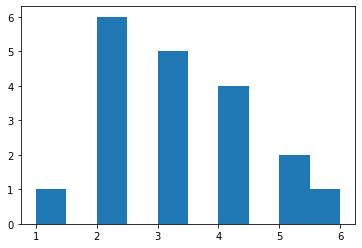

In [43]:
plt.hist(df_blue_parsed[df_blue_parsed['Creature'] == 1]['convertedManaCost'])

In [54]:
np.mean(df_blue_parsed[df_blue_parsed['Creature'] == 1]['convertedManaCost'])

3.1578947368421053

(array([4., 0., 6., 0., 3., 0., 6., 0., 2., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

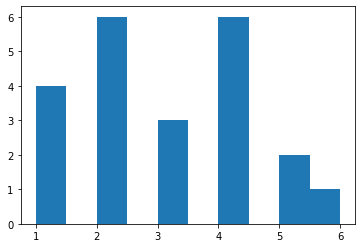

In [44]:
plt.hist(df_white_parsed[df_white_parsed['Creature'] == 1]['convertedManaCost'])

In [55]:
np.mean(df_white_parsed[df_white_parsed['Creature'] == 1]['convertedManaCost'])

2.9545454545454546

In [45]:
df_green = df_cards[df_cards['colors'] == 'G']

df_green_parsed = df_green.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df_green.pop('types')),
        index=df_green.index,
        columns=mlb.classes_))

(array([3., 5., 0., 4., 0., 4., 3., 0., 1., 3.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

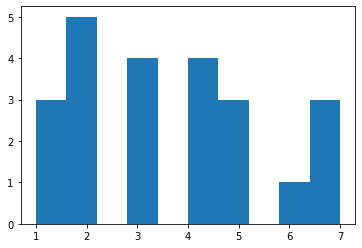

In [49]:
plt.hist(df_green_parsed[df_green_parsed['Creature'] == 1]['convertedManaCost'])

In [56]:
np.mean(df_green_parsed[df_green_parsed['Creature'] == 1]['convertedManaCost'])

3.608695652173913

(array([4., 2., 0., 7., 0., 3., 2., 0., 1., 1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

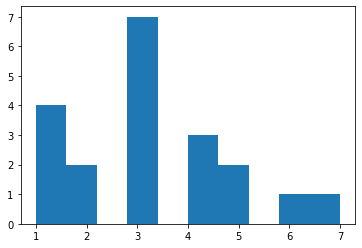

In [60]:
df_red = df_cards[df_cards['colors'] == 'R']

df_red_parsed = df_red.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df_red.pop('types')),
        index=df_red.index,
        columns=mlb.classes_))

plt.hist(df_red_parsed[df_red_parsed['Creature'] == 1]['convertedManaCost'])

In [61]:
np.mean(df_red_parsed[df_red_parsed['Creature'] == 1]['convertedManaCost'])

3.2

(array([1., 0., 5., 0., 7., 0., 6., 0., 4., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

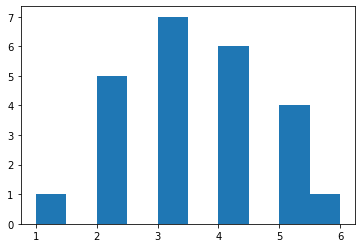

In [58]:
df_black = df_cards[df_cards['colors'] == 'B']

df_black_parsed = df_black.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df_black.pop('types')),
        index=df_black.index,
        columns=mlb.classes_))

plt.hist(df_black_parsed[df_black_parsed['Creature'] == 1]['convertedManaCost'])

In [59]:
np.mean(df_black_parsed[df_black_parsed['Creature'] == 1]['convertedManaCost'])

3.4166666666666665